In this project, I will be doing an exploratory data analysis of stock prices through data visualization. This is not meant to be an analysis for us to practically apply. So, while this will be interesting and I will make observations, this analysis is not to be taken as financial advice. We must always keep in mind that past performance does not gaurentee future performance.

This is my second capstone data analysis project for the Udemy course on "Python for data science and machine learning bootcamp".

In this project, we're going to focus on bank stocks during the financial crisis from January 1st, 2006 through January 1st, 2016.

## Getting the data

First we'll need to obtain the data. We'll be using pandas datareader in order to get financial data from the Web.

### Importing

In [3]:
pip install pandas-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 1.4 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 1.2 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67900 sha256=225163195d0e11ad1f7c63f712ff7acd011bc30107f9d75d6546d9327f9ec7d5
  Stored in directory: /Users/manojsaiguntuka/Library/Caches/pip/wheels/c3/bf/8f/afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [7]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

## The Data

We're going to get the stock information for 6 larger banks during that time:

- Bank of America
- CitiGroup
- Goldman Sachs
- JPMorgan Chase
- Morgan Stanley
- Wells Fargo 

We're going to be using Quandl for the source of our data and will use pandas datareader in order to create dataframes for each bank over our period

In [8]:
#Setting Jan 1st, 2006 through Jan 1st, 2016 as our dates for this analysis
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [9]:
#From the pandas_datareader documentation
import pandas_datareader.data as web

In [11]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [12]:
#From quandl documentation
import quandl
quandl.ApiConfig.api_key = "B1GhMwDUq4teS5ZUyjzR"

In [13]:
quandl_api_key ="B1GhMwDUq4teS5ZUyjzR"

In [15]:
#Bank of America
BAC = web.DataReader('WIKI/BAC', 'quandl', start, end, api_key=quandl_api_key)

In [16]:
#Check that it worked
BAC.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-12-31,17.01,17.07,16.83,16.83,47106760.0,0.0,1.0,16.564256,16.622684,16.388973,16.388973,47106760.0
2015-12-30,17.20,17.24,17.04,17.05,35035518.0,0.0,1.0,16.749277,16.788229,16.593470,16.603208,35035518.0
2015-12-29,17.25,17.35,17.16,17.28,45628449.0,0.0,1.0,16.797967,16.895347,16.710326,16.827181,45628449.0
2015-12-28,17.22,17.23,16.98,17.13,41759993.0,0.0,1.0,16.768753,16.778491,16.535042,16.681112,41759993.0
2015-12-24,17.32,17.38,17.22,17.27,29373415.0,0.0,1.0,16.866133,16.924561,16.768753,16.817443,29373415.0


In [17]:
#CitiGroup
C = web.DataReader('WIKI/C','quandl',start,end,api_key = quandl_api_key)

In [18]:
#Goldman Sachs
GS = web.DataReader('WIKI/GS','quandl',start,end,api_key = quandl_api_key)

In [19]:
#JPMorgan Chase
JPM = web.DataReader('WIKI/JPM','quandl',start,end,api_key = quandl_api_key)

In [21]:
#Morgan Stanley
MS = web.DataReader('WIKI/MS','quandl',start,end,api_key = quandl_api_key)

In [23]:
#Wells Fargo
WFC = web.DataReader('WIKI/WFC','quandl',start,end,api_key = quandl_api_key)

In [24]:
tickers = [BAC,C,GS,JPM,MS,WFC]
tickers_str = ['BAC','C','GS','JPM','MS','WFC']
bank_stocks = pd.concat(tickers,axis=1,keys = tickers_str).sort_values(by='Date')
#note that we added keys to help track what data belongs to which bank

#adding column names to make it easier to read and understand
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [25]:
bank_stocks.head()

Bank Ticker    BAC                                                         \
Stock Info    Open   High    Low  Close      Volume ExDividend SplitRatio   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700.0        0.0        1.0   
2006-01-04   47.00  47.24  46.45  46.58  17757900.0        0.0        1.0   
2006-01-05   46.58  46.83  46.32  46.64  14970700.0        0.0        1.0   
2006-01-06   46.80  46.91  46.35  46.57  12599800.0        0.0        1.0   
2006-01-09   46.72  46.97  46.36  46.60  15619400.0        0.0        1.0   

Bank Ticker                                   ...    WFC                    \
Stock Info     AdjOpen    AdjHigh     AdjLow  ...    Low  Close     Volume   
Date                                          ...                            
2006-01-03   37.126108  37.331837  36.516835  ...  62.39  63.80  5508200.0   
2006-01-04   37.189409  37.379312  36.754214  ...  62.73  63.06  5435000.0   
2006-01-05   36.857078  37.054894  36.651349  ...  62.62  62.99  5079000.0   
2006-01-06   37.031156  37.118195  36.675087  ...  62.77  63.36  4201900.0   
2006-01-09   36.967855  37.165671  36.683000  ...  63.11  63.35  2809800.0   

Bank Ticker                                                                    \
Stock Info  ExDividend SplitRatio    AdjOpen    AdjHigh     AdjLow   AdjClose   
Date                                                                            
2006-01-03         0.0        1.0  22.799832  23.070400  22.507619  23.016287   
2006-01-04         0.0        1.0  22.944135  22.958566  22.630277  22.749327   
2006-01-05         0.0        1.0  22.727681  22.767364  22.590594  22.724074   
2006-01-06         0.0        1.0  22.785402  22.926097  22.644707  22.857554   
2006-01-09         0.0        1.0  22.853946  22.962173  22.767364  22.853946   

Bank Ticker              
Stock Info    AdjVolume  
Date                     
2006-01-03   11016400.0  
2006-01-04   10870000.0  
2006-01-05   10158000.0  
2006-01-06    8403800.0  
2006-01-09    5619600.0  

[5 rows x 72 columns]

# Exploratory Data Analysis

The dataframe looks to be in place so let's begin with our exploration

We'll start by finding the max close price for each bank's stock during this period.

In [26]:
bank_stocks.unstack().xs('Close',level=1).groupby('Bank Ticker').max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

From our data, it looks like the highest close over this period was Goldman Sachs at 247.92.

When looking at stocks, though, we're also interested in the return (the percent change) of the stocks. Let's make a dataframe that represents this for each bank.

In [27]:
returns = bank_stocks.pct_change().xs('Close', level = 'Stock Info', axis=1)
returns.columns = ["BAC Return", "C Return", "GS Return", "JPM Return", "MS Return", "WFC Return"]
returns.columns.names = ['Bank']
returns.head()

Bank,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Now let's look at this data together using a seaborn pairplot to quickly plot the returns against each other and get distribution plots. We should see that the data roughly moves in a positive linear line (higher the return in one bank, higher the return in another because they share the same industry - this is of course unless one significantly outperforms the rest.)

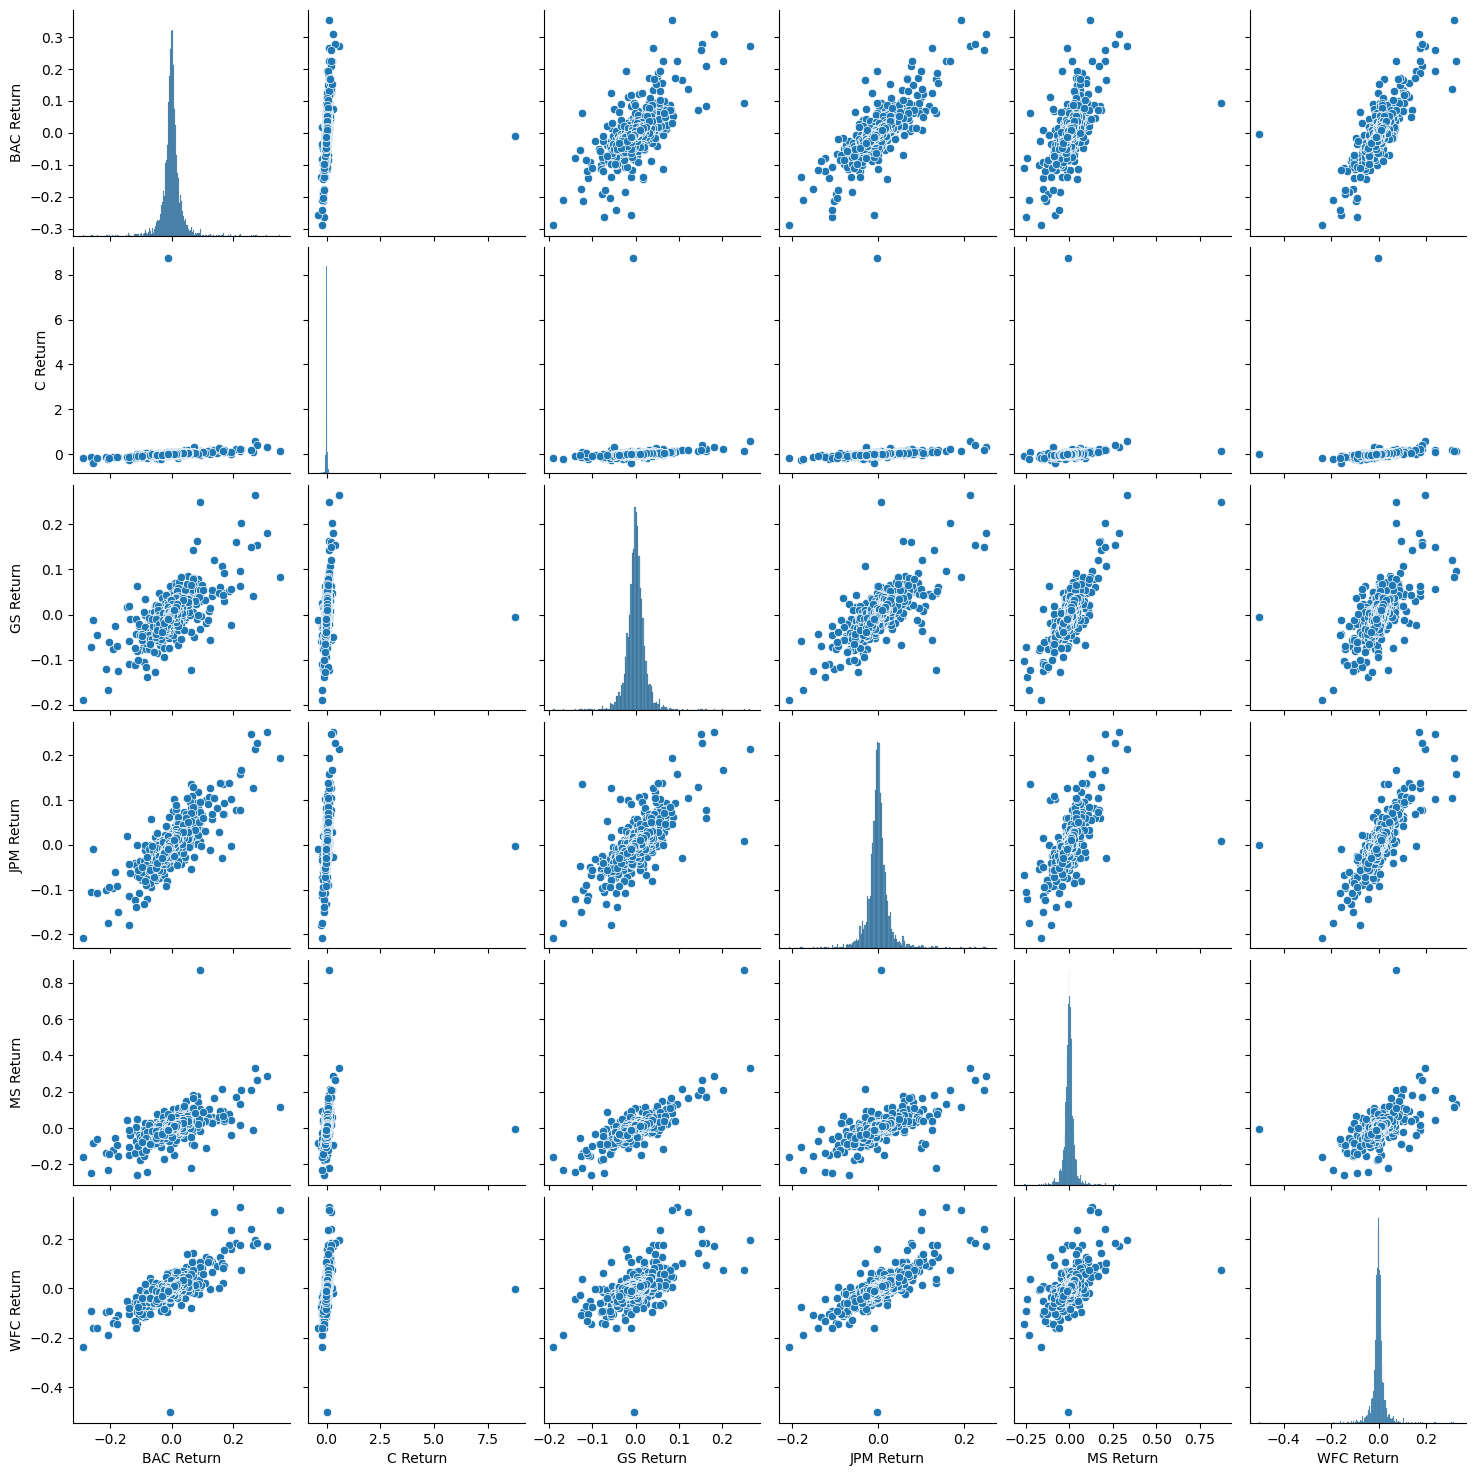

In [87]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(returns)

We see that, for the most part, we see what we expected - a positive, linear line of data points. However, we also notice that Citigroup looks much different than the rest of these graphs. This seems to be due to an extreme outlier. We also notice that all of the axis are different, so we can't compare banks to each other as easily as we should be able to. Let's fix that with another plotting.

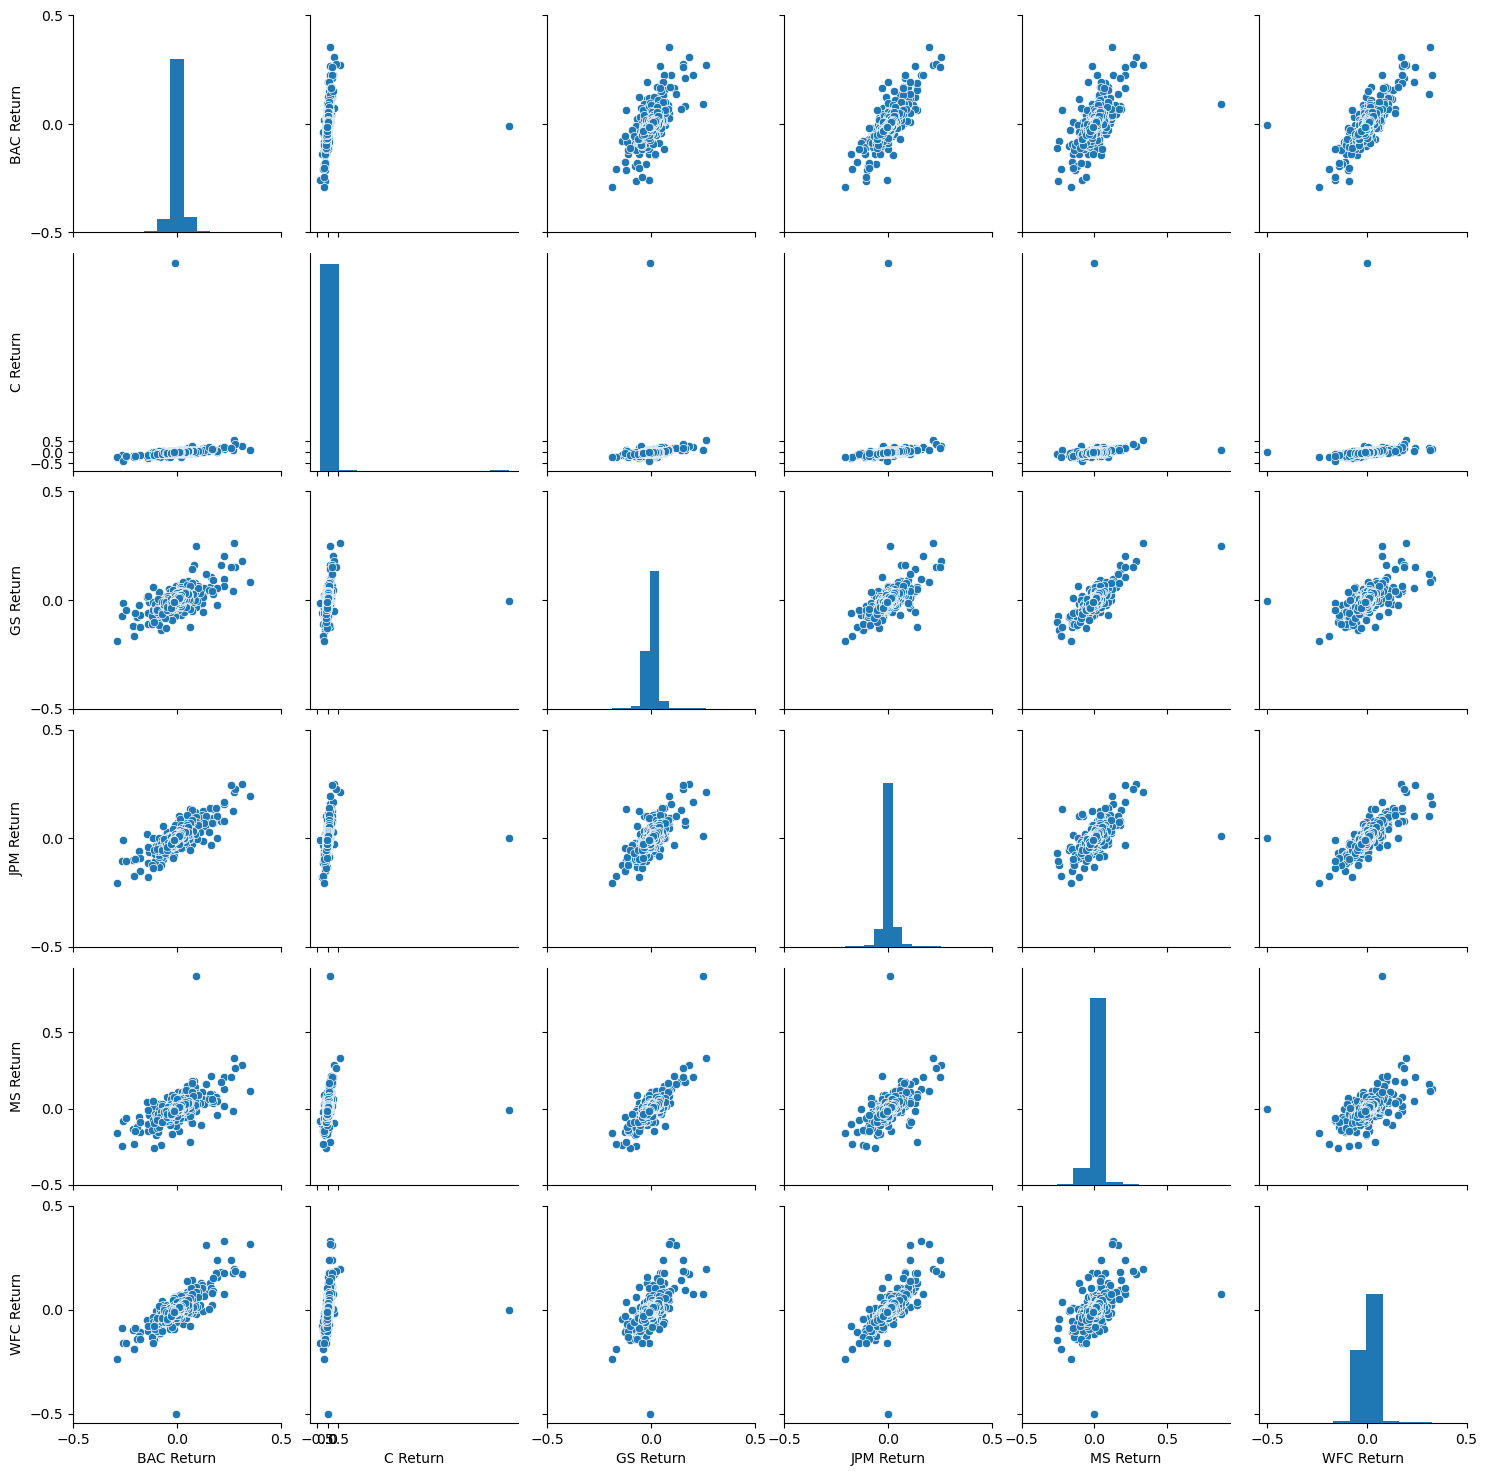

In [29]:
#We'll be using a Pair Grid for more flexibility.
g = sns.PairGrid(returns.dropna())
g.map_diag(plt.hist)
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)

for ax in g.axes.flat:
    ax.set_yticks([-.5,0,.5])
    ax.set_xticks([-.5,0,.5])

We see that, while this didn't help our understanding of Citigroup, this makes it a little easier to compare the other banks to each other. We see that, if the points don't make as clear of a shape or are in the vertical or horizontal direction, it implies that they are not correlated, but if they are shaped more in a diagonal from bottom left to top right, then they are more correlated. A good example of a correlated relationship would be JPM and WFC, where it's very close to a diagonal line. An example with less correlation would be MS and WFC where it doesn't have a real form or shape.

Let's look into this correlation using tree, heat and cluster maps to give us more understanding of how these banks are connected.

In [51]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


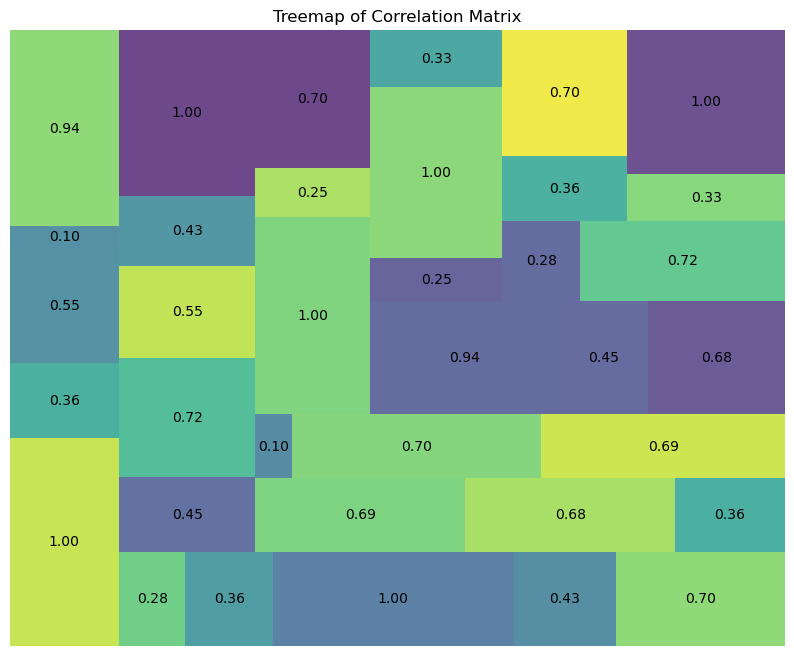

In [55]:
import matplotlib.pyplot as plt
import squarify

# Prepare data
corr_matrix = bank_stocks.xs('Close', level=1, axis=1).corr()
sizes = corr_matrix.values.flatten()
labels = [f'{corr_matrix.values[i // len(corr_matrix)][i % len(corr_matrix)]:.2f}' for i in range(len(sizes))]

# Plotting
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, alpha=.8)
plt.axis('off')
plt.title('Treemap of Correlation Matrix')
plt.show()

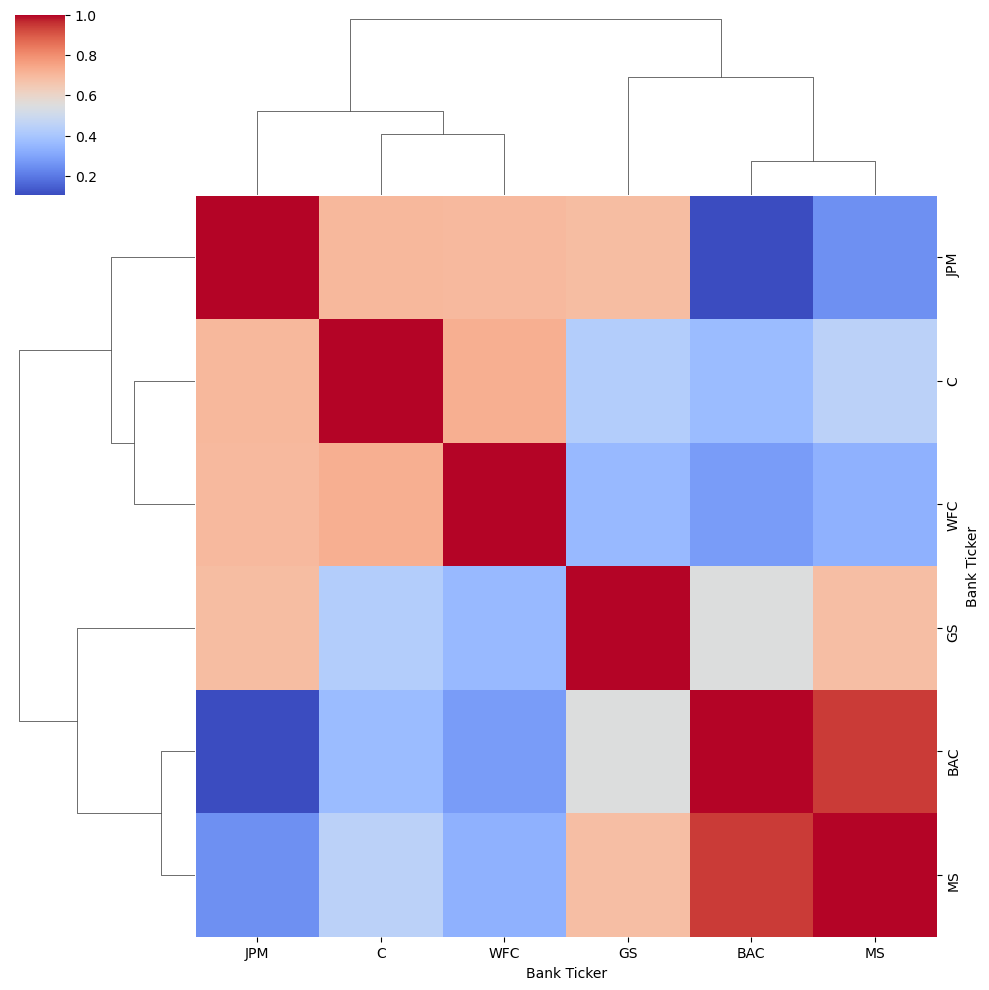

In [59]:
corr_matrix = bank_stocks.xs('Close', level=1, axis=1).corr()  # Get correlation matrix
sns.clustermap(corr_matrix, cmap='coolwarm')  # Annotate the clustermap

We see that the bank combinations from before that we identified as likely being correlated, such as JPM and WFC, are indeed more correlated than what we identified as not being correlated, such as MS and WFC.

We see that, simply by looking at these relationships visually, we can at least get a hint of what these relationships are like and we can determine where to look for further confirmation and investigation, ultimately leading, after confirming those correlations, to insights.

For our example, one could say that, directionally, Morgan Stanley (MS) and Bank of America (BAC) would go in the same direction. You could then hypothesize that MS and BAC would have similar returns.

To see if this hypothesis is true, let's make another heatmap of the returns data to see if it's correlated.

<Axes: xlabel='Bank', ylabel='Bank'>

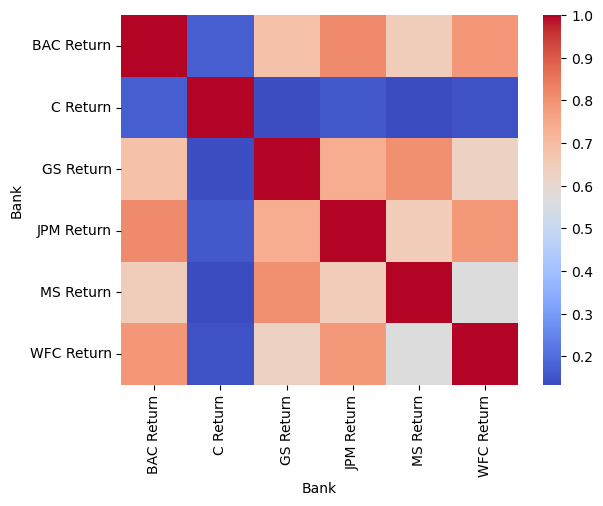

In [60]:
#returns data correlated heat map
sns.heatmap(returns.dropna().corr(),cmap='coolwarm')

We see that the returns for MS and BAC aren't as correlated as we expected. Let's explore why this could be the case

In [44]:
#maybe the average magnitude of the stock prices are big enough to skew this
bank_stocks.xs('Close',level=1, axis=1).agg('mean')

Bank Ticker
BAC     22.174575
C       33.001709
GS     158.481289
JPM     45.985346
MS      36.006091
WFC     37.615326
dtype: float64

As we can see, the average stock price for Morgan Stanley (MS) is almost double the stock price of Bank of America (BAC). Therefore, even if the stock move is highly correlated, the magnitude return percentage of that move would be different due to the different starting magnitudes, leaving the percent returns to being different enough numbers to lower the correlation of the two.

Let's continue exploring the returns dataframe that we made and see what we can find. Let's find the single best and worst day returns for each bank.

In [61]:
#min single day return % date
returns.dropna().idxmin()

Bank
BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2006-08-14
dtype: datetime64[ns]

We see that 3 of the banks had the lowest return % on the same date. Upon investigation on what happened on January 20th, 2009, we find that that was the day when former president Barack Obama was sworn in as president of the United States. It seems that Wallstreet reacted to this change in political climate.

In [62]:
#max single day return % date
returns.dropna().idxmax()

Bank
BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

With the max returns, we notice that JP Morgan (JPM) essentially bounced back the day after Barack Obama's inauguration. This means that we can't read too much into stock moves because of Obama's inauguration, we can only say that stocks are shaky when there is significant political change.

What we're interested in, though, is why Citigroup had such a high return datapoint (seen earlier in the scatterplot graphs). Upon further investigation, we see that Citigroup issued a "reverse stock split" that came into effect on May, 9th, 2011. The reverse stock split essentially combined shares of 10 into one share while keeping the value per share. This means that the value per share stayed the same but essentially combined, giving a percieved 10x the value of the share at the time, which is why citigroup had such a large anomoly in the returns percentage of its graph.

Now let's take a look at the standard deviation (also known as volatility) of the bank returns over the time period.

In [63]:
returns.dropna().std()

Bank
BAC Return    0.036628
C Return      0.179066
GS Return     0.025358
JPM Return    0.027651
MS Return     0.037820
WFC Return    0.031838
dtype: float64

It seems like, over the 10 year period, Citigroup has the most volatility and could be seen as being the riskiest of the stocks over the time period. However, much of this difference is most likely due to the outlier that we found previously. Let's look at the returns for different years to see how they would match up in general.

In [64]:
#2007
returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2007].std()

Bank
Date          104 days 10:56:55.061574640
BAC Return                       0.013765
C Return                         0.018235
GS Return                        0.021539
JPM Return                        0.01685
MS Return                        0.024872
WFC Return                       0.016979
dtype: object

In [65]:
#2008, the year of the financial crisis
returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2008].std()

Bank
Date          105 days 05:43:37.745716758
BAC Return                       0.062934
C Return                         0.073523
GS Return                        0.050015
JPM Return                       0.053134
MS Return                        0.087604
WFC Return                       0.052382
dtype: object

In [66]:
#2015
returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2015].std()

Bank
Date          104 days 20:04:55.551720886
BAC Return                       0.016163
C Return                         0.015289
GS Return                        0.014046
JPM Return                       0.014017
MS Return                        0.016249
WFC Return                       0.012591
dtype: object

We see that, while Citigroup (C) has the highest standard deviation over the whole period, Morgan Stanley (MS) has a higher standard deviation for 2008. Therefore, because Citigroup's standard deviation over the whole period is over 4 times that of MS, we can make the case that this increase is most likely due to the anomoly caused by the reverse stock split.

Now let's look at the distribution of returns for both Citigroup (C) and Morgan Stanley (MS), the two most volatile banks over the time period, for 2007, 2008, and 2015. So we can compare these years, we're going to set all of the x-axis to equal the same across each graph

Text(0.5, 0.98, '2007 Returns Distribution')

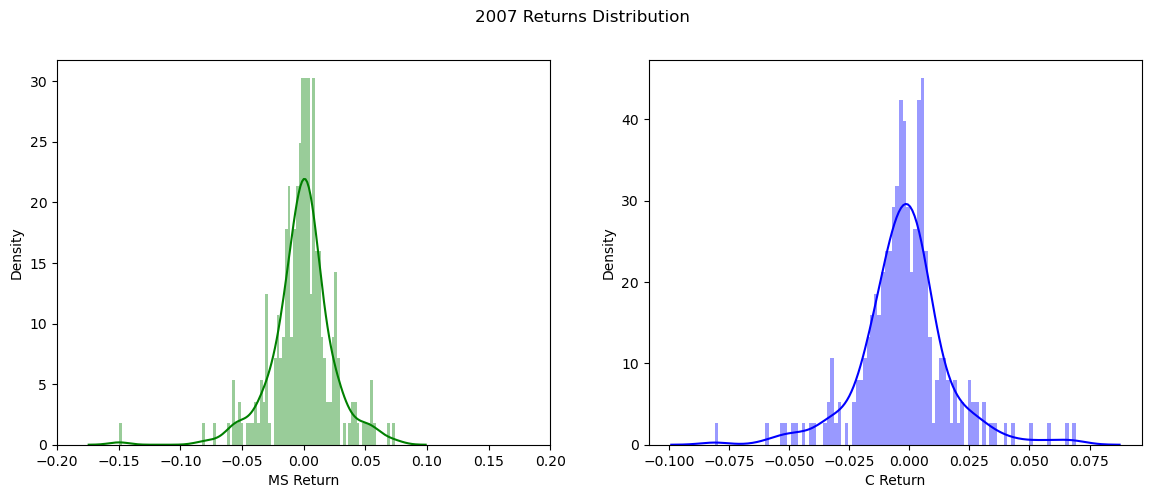

In [75]:
import warnings
warnings.filterwarnings('ignore')
#2007
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
#MS
sns.distplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2007]['MS Return'], bins=100,color = 'green', ax=axes[0])
#C
sns.distplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2007]['C Return'], bins=100,color = 'blue', ax=axes[1])
axes[0].set_xlim(-.2,.2)
fig.suptitle('2007 Returns Distribution')

Text(0.5, 0.98, '2008 Returns Distribution')

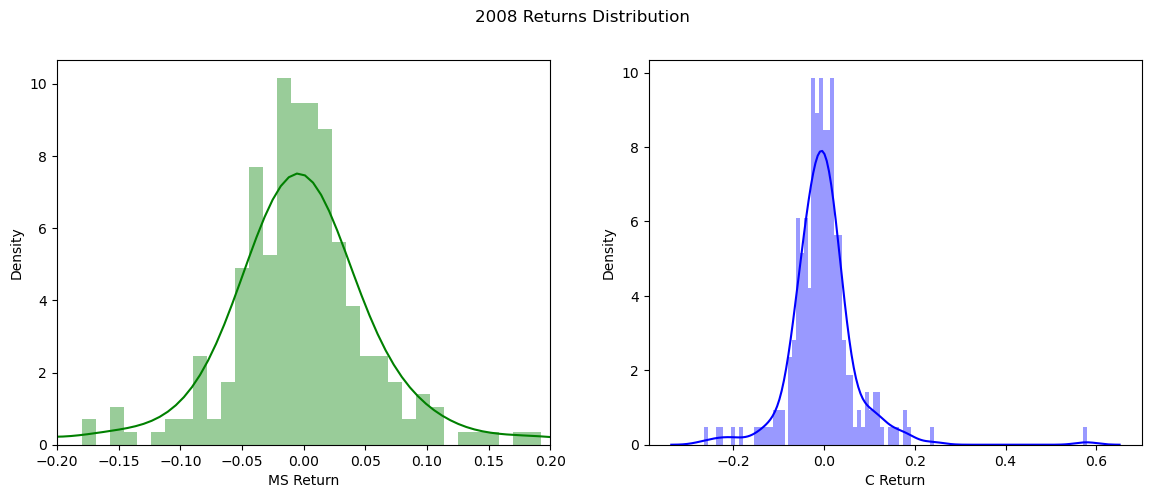

In [76]:
import warnings
warnings.filterwarnings('ignore')
#2008
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
#MS
sns.distplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2008]['MS Return'], bins=100,color = 'green', ax=axes[0])
#C
sns.distplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2008]['C Return'], bins=100,color = 'blue', ax=axes[1])
axes[0].set_xlim(-.2,.2)
fig.suptitle('2008 Returns Distribution')

Text(0.5, 0.98, '2015 Returns Distribution')

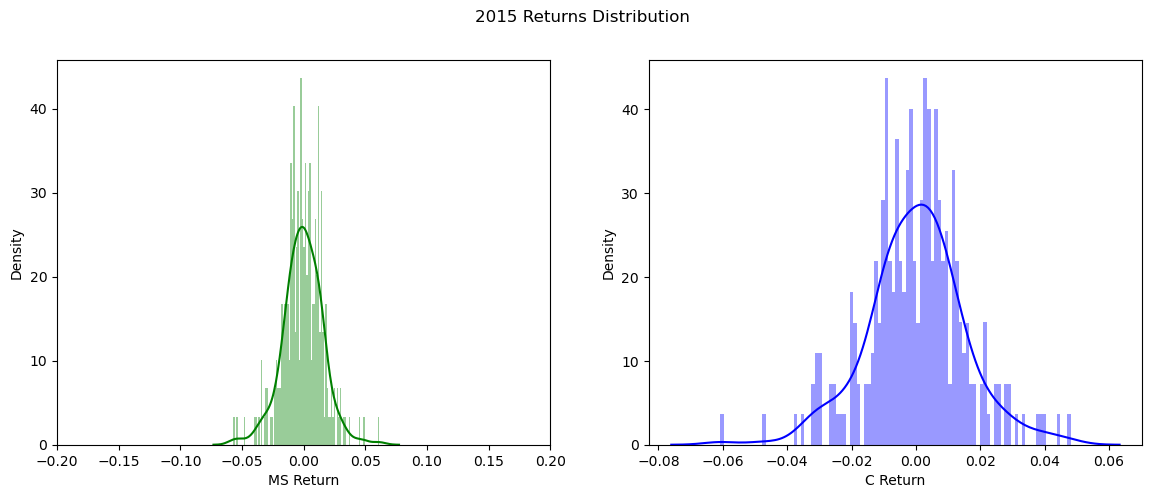

In [88]:
import warnings
warnings.filterwarnings('ignore')
#2008
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
#MS
sns.distplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2015]['MS Return'], bins=100,color = 'green', ax=axes[0])
#C
sns.distplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2015]['C Return'], bins=100,color = 'blue', ax=axes[1])
axes[0].set_xlim(-.2,.2)
fig.suptitle('2015 Returns Distribution')

We see that, as expected, the variance in 2008 is much wider due to the volatility that occured during the financial crisis.

Let's look at the close price of all of these stocks over this period - in other words, let's see the movement of each stock over this period

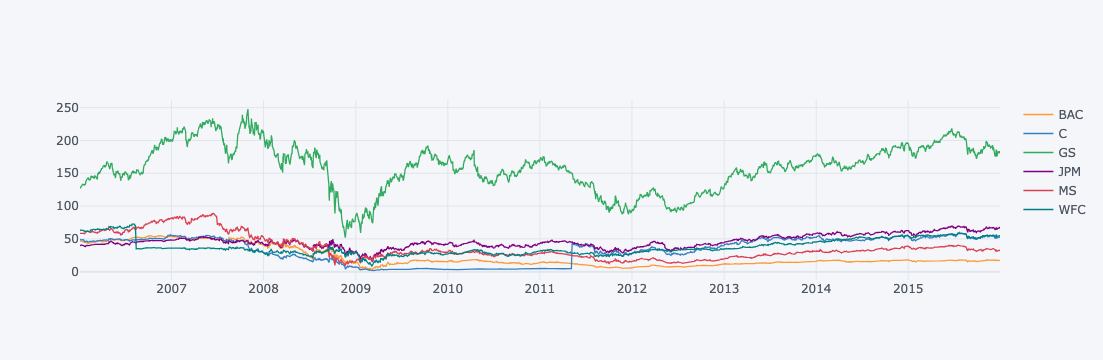

In [79]:
bank_stocks.xs('Close',level=1, axis=1).iplot()

As expected, 2008 is when a lot of the downside happened. Let's look at some rolling averages for a couple of these banks.

In [80]:
#to make it clear and easier to follow, we'll make a new dataframe for each graph we do
bank_stocks_closing08=bank_stocks.xs('Close',level=1, axis=1).reset_index()[bank_stocks.xs('Close',level=1, axis=1).reset_index()['Date'].dt.year==2008]

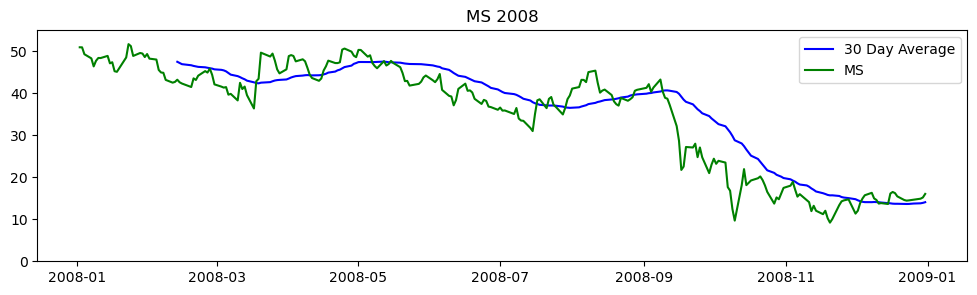

In [81]:
#MS
fig, axes = plt.subplots(figsize = (12,3))
axes.plot(bank_stocks_closing08.set_index('Date').rolling(window=30).mean()['MS'],color='blue', label='30 Day Average')
axes.plot(bank_stocks_closing08.set_index('Date')['MS'],color='green', label='MS')
axes.set_ylim(0,55)
axes.set_title('MS 2008')
plt.legend(loc='upper right')

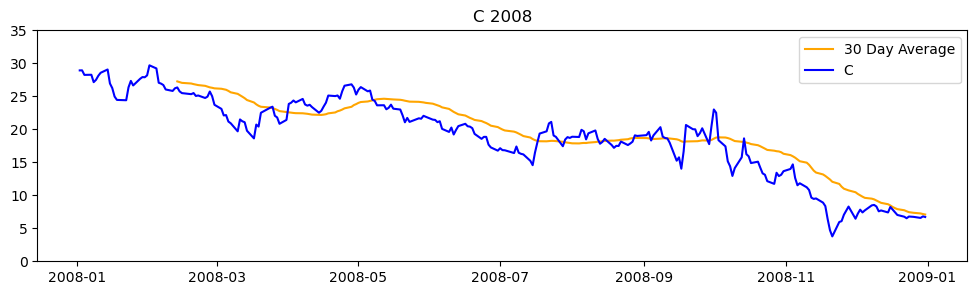

In [82]:
#C
fig, axes = plt.subplots(figsize = (12,3))
axes.plot(bank_stocks_closing08.set_index('Date').rolling(window=30).mean()['C'],color='orange',label='30 Day Average')
axes.plot(bank_stocks_closing08.set_index('Date')['C'],color='blue',label='C')
axes.set_ylim(0,35)
axes.set_title('C 2008')
plt.legend(loc='upper right')

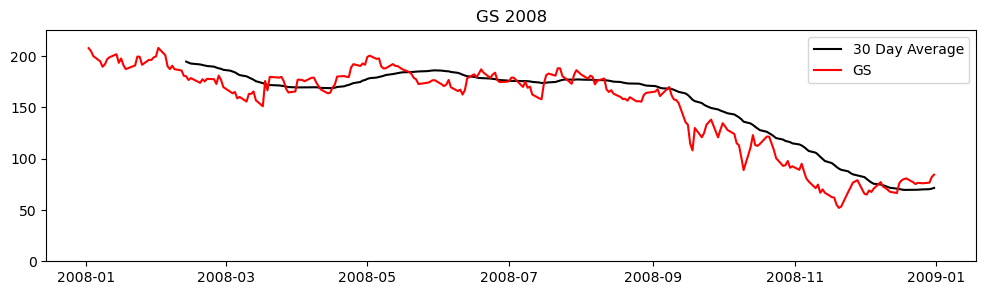

In [83]:
#GS
fig, axes = plt.subplots(figsize = (12,3))
axes.plot(bank_stocks_closing08.set_index('Date').rolling(window=30).mean()['GS'],color='black',label='30 Day Average')
axes.plot(bank_stocks_closing08.set_index('Date')['GS'],color='red',label='GS')
axes.set_ylim(0,225)
axes.set_title('GS 2008')
plt.legend(loc='upper right')

We see very similar shapes with regards to each of the moving averages for these three banks.

## Technical Analysis Plots

Let's use some of cufflinks' advanced features for making some technical analysis plots for the most recent year in the dataset, 2015

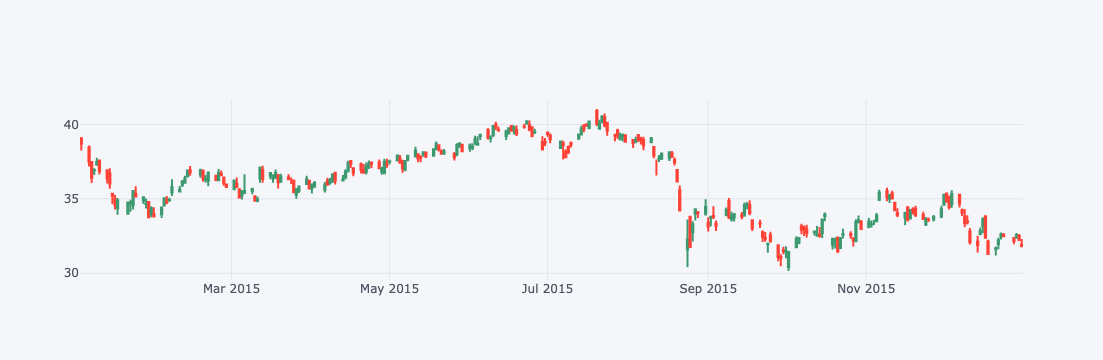

In [84]:
#Candlestick chart
bank_stocks['MS'].reset_index()[bank_stocks['MS'].reset_index()['Date'].dt.year==2015].set_index('Date').iplot(kind='candle')

Candle stick charts are one of the most common charts stock traders look at in assessing a stock's move.

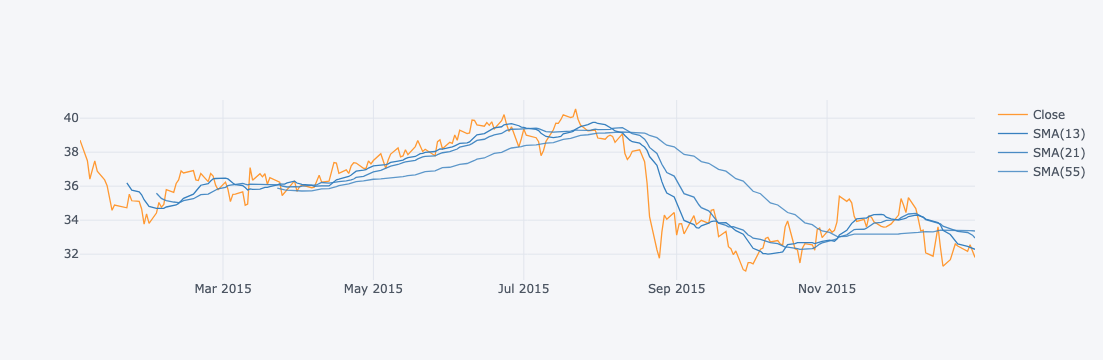

In [85]:
#Simple Moving Averages
bank_stocks['MS'].reset_index()[bank_stocks['MS'].reset_index()['Date'].dt.year==2015].set_index('Date')['Close'].ta_plot(study='sma',periods=[13,21,55])

We can see that we can easily make multiple moving average plots using cufflinks very easily through plotly.

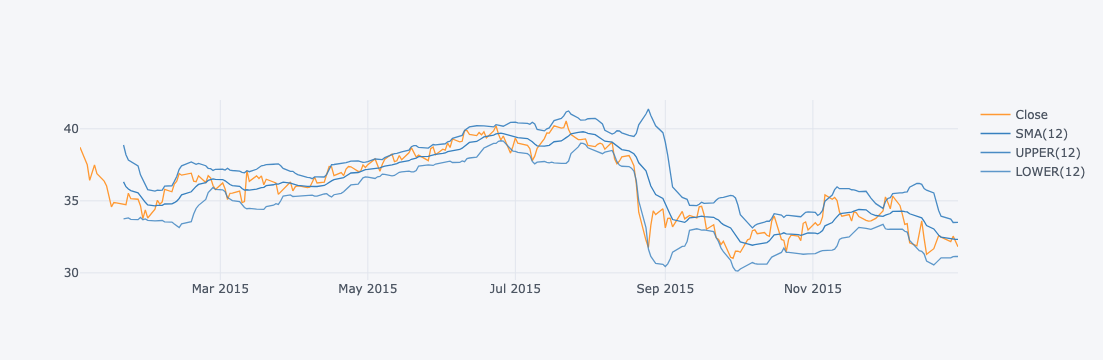

In [86]:
#Bollinger Bands
bank_stocks['MS'].reset_index()[bank_stocks['MS'].reset_index()['Date'].dt.year==2015].set_index('Date')['Close'].ta_plot(study='boll', periods=12)


The above Bollinger Bands plot gives you a lot of information, including the lower and upper two standard deviation "limits" for the stock performance. This can be extremely useful to both see the moving average along with the volatility of the stock.

# Conclusion

By analyzing this set of data, we saw that correlation in closing price didn't mean exact correlation in return % due to magnitude difference of stock price. We also visualized the 2008 downturn for these bank stocks and observed the increased volatility they endured. We found that a stock split by Citigroup created an anomaly that skewed some of our standard deviation results; if we wanted to do more analysis, we could consider accounting for that anomaly by normalizing our data based on market capitalization.

Being able to analyze web stock data through Quandl using pandas with python, especially while using very little code, is incredibly powerful to run your own, detailed analysis.